In [1]:
import pandas as pd
import numpy as np
import warnings
# warnings.filterwarnings("ignore")
from sklearn import set_config

set_config(transform_output="pandas")


In [2]:
df = pd.read_csv('train.csv')
df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [3]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


marital, default, housing, loan, contact, poutcome - ohe  
job - embeddings

In [4]:
np.unique(df['marital'])

array(['divorced', 'married', 'single'], dtype=object)

In [5]:
np.unique(df['default'])

array(['no', 'yes'], dtype=object)

In [6]:
np.unique(df['housing'])

array(['no', 'yes'], dtype=object)

In [7]:
np.unique(df['loan'])

array(['no', 'yes'], dtype=object)

In [8]:
np.unique(df['contact'])

array(['cellular', 'telephone', 'unknown'], dtype=object)

In [9]:
np.unique(df['poutcome'])

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [10]:
np.unique(df['job'])

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [11]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')

In [12]:
Y = df['y']
df.drop('y', axis=1, inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df, Y, test_size=0.001, random_state=1488, stratify=Y)

In [14]:
X_train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
681434,681434,60,housemaid,married,primary,no,12,no,no,unknown,20,jun,4,1,-1,0,unknown
242836,242836,32,entrepreneur,married,secondary,no,12,yes,no,cellular,2,feb,75,1,-1,0,unknown
119636,119636,48,blue-collar,married,primary,no,553,no,no,unknown,19,jun,781,1,-1,0,unknown
565512,565512,31,technician,single,secondary,no,49,yes,no,cellular,5,may,778,1,-1,0,unknown
26616,26616,33,management,married,tertiary,no,0,no,no,cellular,28,aug,75,3,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507303,507303,43,blue-collar,married,secondary,no,100,yes,no,telephone,12,may,6,5,-1,0,unknown
298049,298049,43,admin.,married,secondary,no,3185,yes,no,unknown,15,may,466,1,-1,0,unknown
612958,612958,42,management,single,tertiary,no,797,yes,no,unknown,26,may,107,2,-1,0,unknown
696894,696894,43,services,single,secondary,no,8,yes,no,cellular,12,may,203,1,182,10,success


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

/home/nomad/Downloads/mainpy/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-1.0, 10.0)

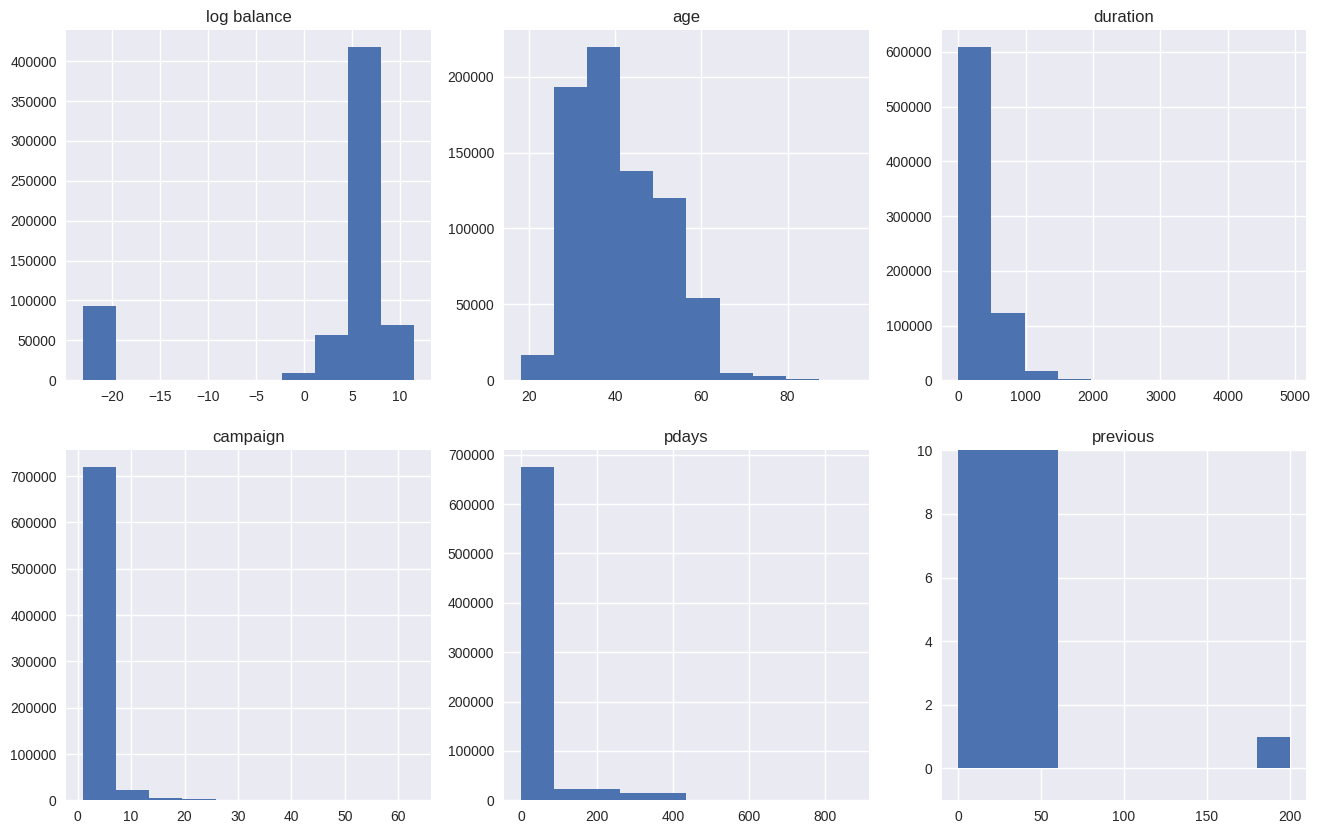

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(16,10));
axes[0][0].hist(np.log(df['balance'] + 1e-10));
axes[0][0].set_title('log balance')
axes[0][1].hist(df['age']);
axes[0][1].set_title('age')
axes[0][2].hist(df['duration']);
axes[0][2].set_title('duration')
axes[1][0].hist(df['campaign']);
axes[1][0].set_title('campaign')
axes[1][1].hist(df['pdays']);
axes[1][1].set_title('pdays')
axes[1][2].hist(df['previous']);
axes[1][2].set_title('previous')
axes[1, 2].set_ylim(-1, 10)

<Axes: xlabel='previous', ylabel='Count'>

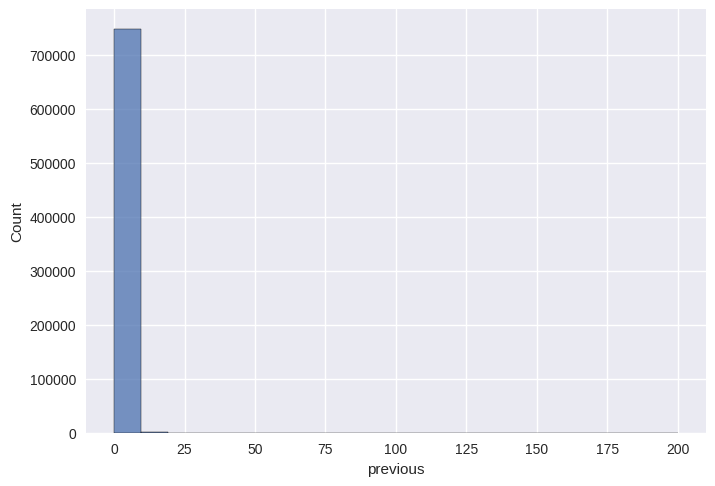

In [17]:
sns.histplot(X_train['previous'])

(0.0, 25000.0)

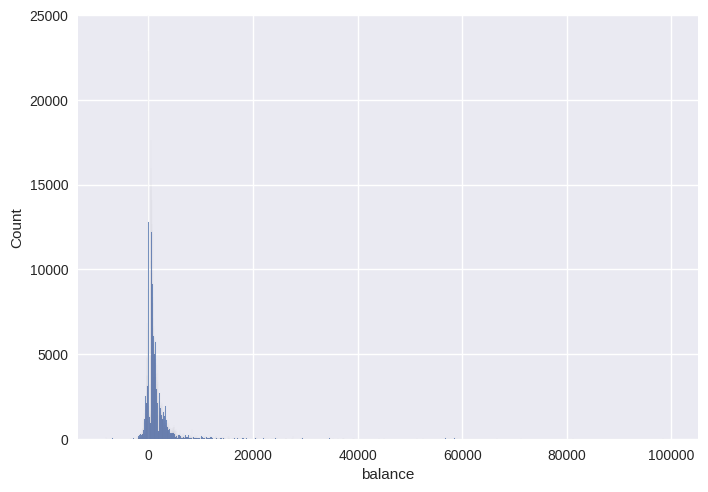

In [18]:
sns.histplot(X_train['balance'])
plt.ylim(0, 25000)

In [19]:
threshold_balance = np.percentile(X_train['balance'], q=99)
X_train['threshold_balance'] = np.where(X_train['balance'] > threshold_balance, 'YES', 'NO')
X_val['threshold_balance'] = np.where(X_val['balance'] > threshold_balance, 'YES', 'NO')

In [20]:
X_train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,threshold_balance
681434,681434,60,housemaid,married,primary,no,12,no,no,unknown,20,jun,4,1,-1,0,unknown,NO
242836,242836,32,entrepreneur,married,secondary,no,12,yes,no,cellular,2,feb,75,1,-1,0,unknown,NO
119636,119636,48,blue-collar,married,primary,no,553,no,no,unknown,19,jun,781,1,-1,0,unknown,NO
565512,565512,31,technician,single,secondary,no,49,yes,no,cellular,5,may,778,1,-1,0,unknown,NO
26616,26616,33,management,married,tertiary,no,0,no,no,cellular,28,aug,75,3,-1,0,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507303,507303,43,blue-collar,married,secondary,no,100,yes,no,telephone,12,may,6,5,-1,0,unknown,NO
298049,298049,43,admin.,married,secondary,no,3185,yes,no,unknown,15,may,466,1,-1,0,unknown,NO
612958,612958,42,management,single,tertiary,no,797,yes,no,unknown,26,may,107,2,-1,0,unknown,NO
696894,696894,43,services,single,secondary,no,8,yes,no,cellular,12,may,203,1,182,10,success,NO


<Axes: xlabel='previous', ylabel='Count'>

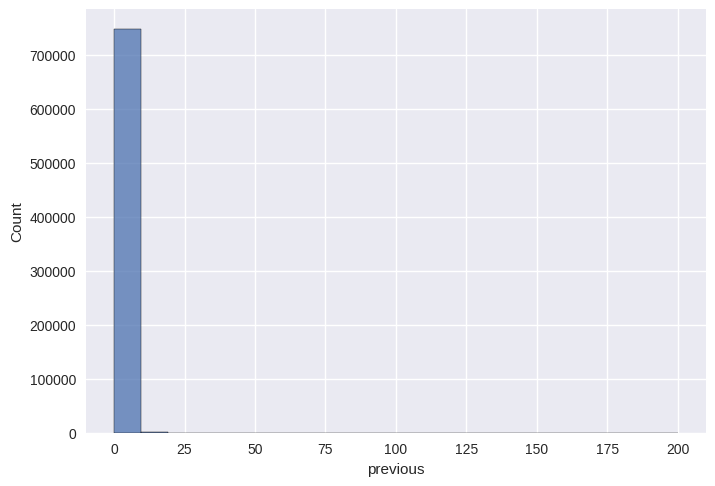

In [21]:
sns.histplot((X_train['previous']))

In [22]:
# y_train = y_train[(X_train['previous'] < 60)]
# X_train = X_train[(X_train['previous'] < 60)]

<Axes: xlabel='pdays', ylabel='Count'>

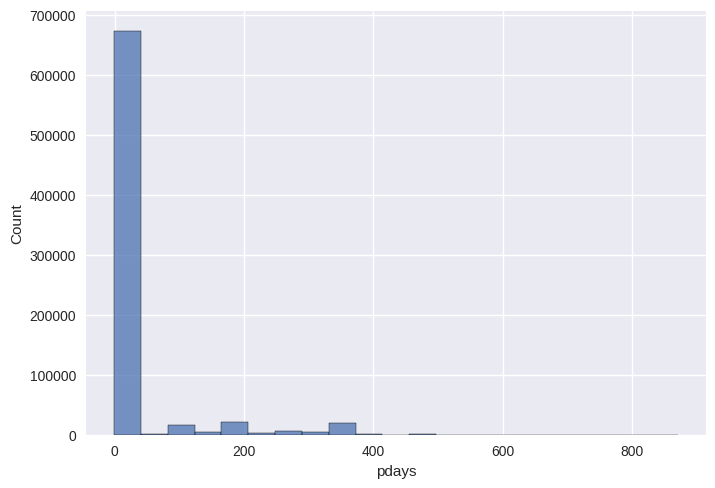

In [23]:
sns.histplot(X_train['pdays'])

In [24]:
# sns.histplot(np.log(X_train['pdays']))

In [25]:
# y_train = y_train[(X_train['pdays'] < 600)]
# X_train = X_train[(X_train['pdays'] < 600)]

<Axes: xlabel='campaign', ylabel='Count'>

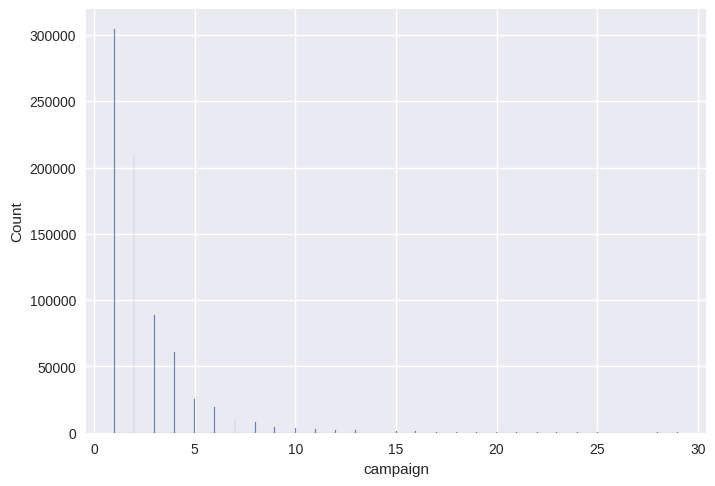

In [26]:
sns.histplot(X_train[X_train['campaign'] < 30]['campaign'])

<Axes: xlabel='campaign', ylabel='Count'>

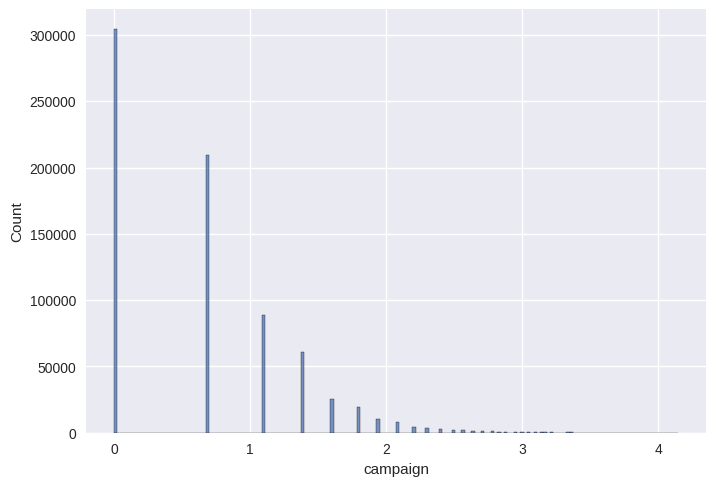

In [27]:
sns.histplot(np.log(X_train['campaign']))

In [28]:
# y_train = y_train[X_train['campaign'] < 30]
# X_train = X_train[X_train['campaign'] < 30]


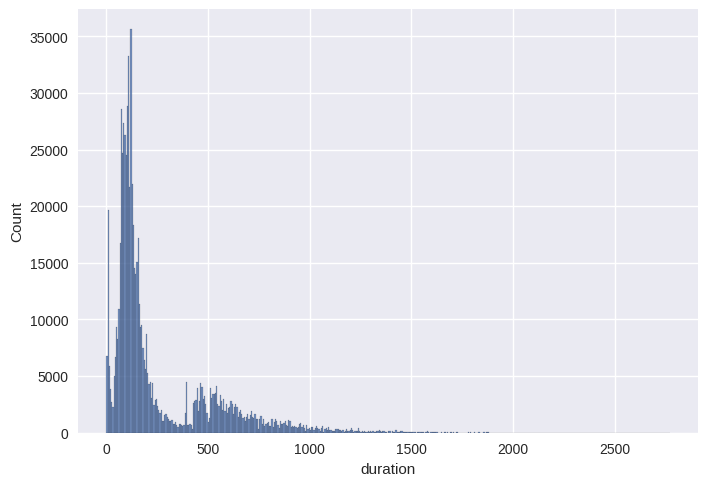

In [29]:
sns.histplot(X_train[X_train['duration'] < 3000]['duration']);

<Axes: xlabel='duration', ylabel='Count'>

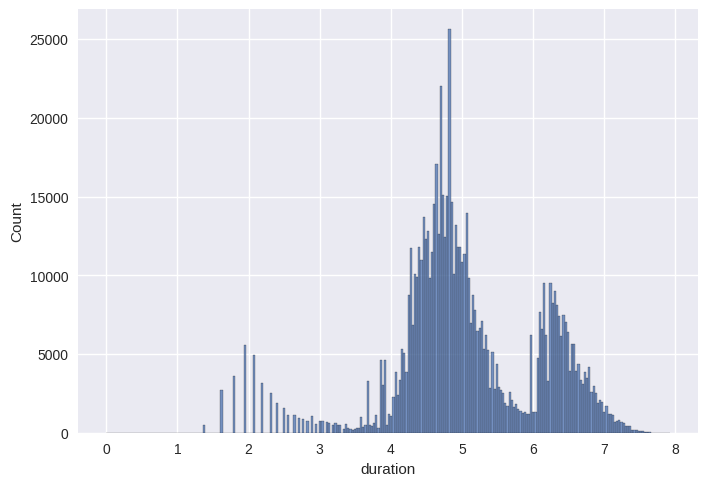

In [30]:
sns.histplot(np.log(X_train[X_train['duration'] < 3000]['duration']))

In [31]:
# np.sum(X_train['duration'] > 2000)

In [32]:
# y_train = y_train[X_train['duration'] < 3000]
# X_train = X_train[X_train['duration'] < 3000]


In [33]:
# y_train = y_train[(X_train['previous'] < 60)]
# X_train = X_train[(X_train['previous'] < 60)]

# y_train = y_train[X_train['campaign'] < 30]
# X_train = X_train[X_train['campaign'] < 30]


# y_train = y_train[(X_train['pdays'] < 600)]
# X_train = X_train[(X_train['pdays'] < 600)]

# y_train = y_train[X_train['duration'] < 3000]
# X_train = X_train[X_train['duration'] < 3000]

# num_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
# cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'threshold_balance']
# date_features = ['day', 'month']
# num_features2 = ['previous', 'campaign', 'pdays', 'duration']

In [34]:
# num_features2 = ['previous', 'campaign', 'pdays', 'duration']

In [35]:
# X_train

In [36]:
# from sklearn.base import BaseEstimator, TransformerMixin
# import numpy as np

# class Log1pShiftTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, eps=1e-10):
#         self.eps = eps
#         self.min_ = None

#     def fit(self, X, y=None):
#         # Вычисляем минимум по трейну
#         self.min_ = X.min()  # для Series или 1D
#         return self

#     def transform(self, X):
#         if self.min_ is None:
#             raise RuntimeError("Трансформер не был обучён. Вызови fit() сначала.")

#         # Применяем преобразование
#         shifted = X - self.min_ + self.eps
#         return np.log1p(shifted)

In [37]:
# month_to_int = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
# X_train['month'].apply(lambda x : month_to_int[x])

In [38]:
# from sklearn.preprocessing import FunctionTransformer
# def create_timestamp(X):
#     dates = pd.DataFrame({
#         # 'year' : 1976,
#         'month': X['month'].apply(lambda x : month_to_int[x]),
#         'day' : X['day']
#     })
#     epoch = pd.Timestamp("1970-01-01")
#     dates = dates.apply(lambda row: pd.to_datetime(f"1970-{row['month']}-{row['day']}", errors='coerce'), axis=1)

#     dates.fillna(dates.mean())
#     delta = dates - epoch
#     days = delta.dt.days
#     return days.values.reshape(-1, 1).astype('int64')

In [ ]:

y_train = y_train[(X_train['previous'] < 60)]
X_train = X_train[(X_train['previous'] < 60)]

y_train = y_train[X_train['campaign'] < 30]
X_train = X_train[X_train['campaign'] < 30]


y_train = y_train[(X_train['pdays'] < 600)]
X_train = X_train[(X_train['pdays'] < 600)]

y_train = y_train[X_train['duration'] < 3000]
X_train = X_train[X_train['duration'] < 3000]

num_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
cat_features = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'poutcome', 'threshold_balance']
date_features = ['day', 'month']
num_features2 = ['previous', 'campaign', 'pdays', 'duration']
d2 = set(num_features) - set(num_features2)
num_features = list(d2)

from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Log1pShiftTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, eps=1e-10):
        self.eps = eps
        self.min_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            self.min_ = X.min()
        else:
            self.min_ = pd.Series(X.min(), index=[0])
        return self

    def transform(self, X):
        if self.min_ is None:
            raise RuntimeError("Трансформер не был обучён.")

        # Приведём X к DataFrame, если это numpy array
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.min_.index)

        shifted = X - self.min_ + self.eps
        transformed = np.log1p(shifted)

        # Вернём DataFrame с сохранением имен колонок
        return pd.DataFrame(transformed, columns=X.columns)

month_to_int = {'jan' : 1, 'feb' : 2, 'mar' : 3, 'apr' : 4, 'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 'sep' : 9, 'oct' : 10, 'nov' : 11, 'dec' : 12}
# X_train['month'].apply(lambda x : month_to_int[x])

from sklearn.preprocessing import FunctionTransformer
def create_timestamp(X):
    """Преобразует day и month в число дней с 1970-01-01"""
    # print(X)
    # Убедимся, что X — DataFrame
    if not isinstance(X, pd.DataFrame):
        X = pd.DataFrame(X, columns=['day', 'month'])

    # Конвертируем month в числа
    month_nums = X['month'].map(month_to_int)

    # Создаём даты
    dates = pd.to_datetime(
        {'year': 1970, 'month': month_nums, 'day': X['day']},
        errors='coerce'
    )

    # Заполняем пропуски средней датой
    mean_date = dates.mean()
    dates = dates.fillna(mean_date)

    # Считаем дни с 1970-01-01
    epoch = pd.Timestamp("1970-01-01")
    days = (dates - epoch).dt.days

    # Вернём DataFrame с именем колонки
    return pd.DataFrame(days, columns=['timestamp'])


timestamp_transformer = FunctionTransformer(create_timestamp, validate=False)
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


num2_column_transformer = ColumnTransformer([
    ('num2_log', Log1pShiftTransformer(), num_features2),
    ('num2_sc', StandardScaler(), num_features2)
],
n_jobs=-1, remainder='passthrough')

num1_column_transformer = ColumnTransformer([
    ('num1', StandardScaler(), num_features)
],
n_jobs=-1, remainder='passthrough')


preprocessor_date = ColumnTransformer([
    # ('cat', OneHotEncoder(drop='first'), cat_features),
    ('date', timestamp_transformer, date_features),
    # ('num', preprocess_num, num_features)
],
n_jobs=-1, remainder='passthrough')

full_preprocessor = ColumnTransformer([
    # Для log_features: логарифм + стандартизация
    ('log_scaled', Pipeline([
        ('log', Log1pShiftTransformer()),
        ('scale', StandardScaler())
    ]), num_features2),

    # Для других числовых: только стандартизация
    ('num', StandardScaler(), num_features),

    # Для даты

    ('date', FunctionTransformer(create_timestamp), date_features)

    # Для категориальных
    # ('cat', OneHotEncoder(drop='first'), cat_features)
], remainder='passthrough', verbose_feature_names_out=False)
X_train_processed = full_preprocessor.fit_transform(X_train)

        day month
681434   20   jun
242836    2   feb
119636   19   jun
565512    5   may
26616    28   aug
...     ...   ...
507303   12   may
298049   15   may
612958   26   may
696894   12   may
729634    5   jun

[748244 rows x 2 columns]


In [40]:
X_train_processed

,duration,pdays,campaign,previous,age,balance,timestamp,id,job,marital,education,default,housing,loan,contact,poutcome,threshold_balance
681434,-3.502608,-0.304310,-0.610587,-0.226499,1.888399,-0.420999,170,681434,housemaid,married,primary,no,no,no,unknown,unknown,NO
242836,-0.703359,-0.304310,-0.610587,-0.226499,-0.884033,-0.420999,32,242836,entrepreneur,married,secondary,no,yes,no,cellular,unknown,NO
119636,1.534257,-0.304310,-0.610587,-0.226499,0.700214,-0.229937,169,119636,blue-collar,married,primary,no,no,no,unknown,unknown,NO
565512,1.530581,-0.304310,-0.610587,-0.226499,-0.983048,-0.407932,124,565512,technician,single,secondary,no,yes,no,cellular,unknown,NO
26616,-0.703359,-0.304310,0.178584,-0.226499,-0.785017,-0.425237,239,26616,management,married,tertiary,no,no,no,cellular,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507303,-3.115394,-0.304310,0.967755,-0.226499,0.205137,-0.389921,131,507303,blue-collar,married,secondary,no,yes,no,telephone,unknown,NO
298049,1.041112,-0.304310,-0.610587,-0.226499,0.205137,0.699592,134,298049,admin.,married,secondary,no,yes,no,unknown,unknown,NO
612958,-0.364013,-0.304310,-0.216001,-0.226499,0.106121,-0.143765,145,612958,management,single,tertiary,no,yes,no,unknown,unknown,NO
696894,0.247538,2.098708,-0.610587,7.387139,0.205137,-0.422412,131,696894,services,single,secondary,no,yes,no,cellular,success,NO


In [41]:
X_val_processed = full_preprocessor.transform(X_val)


        day month
82675    28   jul
130548   20   may
161033   21   may
709248   16   apr
258186   30   jul
...     ...   ...
56870    14   jul
401323   14   may
33418    28   aug
710515    3   feb
726821   11   aug

[750 rows x 2 columns]


In [42]:
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import roc_auc_score
model = CatBoostClassifier(
    custom_loss=[metrics.AUC()],
    random_seed=42,
    logging_level='Silent'
)

In [43]:
X_train_processed


,duration,pdays,campaign,previous,age,balance,timestamp,id,job,marital,education,default,housing,loan,contact,poutcome,threshold_balance
681434,-3.502608,-0.304310,-0.610587,-0.226499,1.888399,-0.420999,170,681434,housemaid,married,primary,no,no,no,unknown,unknown,NO
242836,-0.703359,-0.304310,-0.610587,-0.226499,-0.884033,-0.420999,32,242836,entrepreneur,married,secondary,no,yes,no,cellular,unknown,NO
119636,1.534257,-0.304310,-0.610587,-0.226499,0.700214,-0.229937,169,119636,blue-collar,married,primary,no,no,no,unknown,unknown,NO
565512,1.530581,-0.304310,-0.610587,-0.226499,-0.983048,-0.407932,124,565512,technician,single,secondary,no,yes,no,cellular,unknown,NO
26616,-0.703359,-0.304310,0.178584,-0.226499,-0.785017,-0.425237,239,26616,management,married,tertiary,no,no,no,cellular,unknown,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507303,-3.115394,-0.304310,0.967755,-0.226499,0.205137,-0.389921,131,507303,blue-collar,married,secondary,no,yes,no,telephone,unknown,NO
298049,1.041112,-0.304310,-0.610587,-0.226499,0.205137,0.699592,134,298049,admin.,married,secondary,no,yes,no,unknown,unknown,NO
612958,-0.364013,-0.304310,-0.216001,-0.226499,0.106121,-0.143765,145,612958,management,single,tertiary,no,yes,no,unknown,unknown,NO
696894,0.247538,2.098708,-0.610587,7.387139,0.205137,-0.422412,131,696894,services,single,secondary,no,yes,no,cellular,success,NO


In [44]:
cat_features += ['default']

In [45]:
model.fit(
    X_train_processed, y_train,
    cat_features=cat_features,
    eval_set=(X_val_processed, y_val),
    # logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [46]:
test_df = pd.read_csv('test.csv')
test_df['threshold_balance'] = np.where(test_df['balance'] > threshold_balance, 'YES', 'NO')


In [47]:
test_df = full_preprocessor.transform(test_df)
test_pred_prob = model.predict_proba(test_df)

        day month
0        21   may
1         3   apr
2        13   may
3        29   may
4        22   jul
...     ...   ...
249995   18   nov
249996   19   nov
249997    3   jul
249998   30   may
249999    6   apr

[250000 rows x 2 columns]


In [ ]:
test_pred_prob = model.predict_proba(test_df)
submisstion = pd.DataFrame()
submisstion['id'] = test_df['id']
submisstion['y'] = test_pred_prob[:, 1]
submisstion.to_csv('submission.csv', index=False)

In [49]:
submisstion

,id,y
0,750000,0.005418
1,750001,0.063640
2,750002,0.000215
3,750003,0.000075
4,750004,0.028405
...,...,...
249995,999995,0.000091
249996,999996,0.084991
249997,999997,0.442319
249998,999998,0.000539


In [50]:
from sklearn.metrics import accuracy_score, recall_score
y_pred = model.predict(X_val)
print(accuracy_score(y_val, y_pred))

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=2]="technician": Cannot convert 'technician' to float

In [ ]:
from sklearn.metrics import roc_auc_score
y_pred_pr = model.predict_log_proba(X_val)

In [ ]:
np.unique(y_pred_pr)

array([-0.725937  , -0.69314718, -0.66139848])

In [ ]:
y_pred_pr

array([[-0.69314718, -0.69314718],
       [-0.69314718, -0.69314718],
       [-0.69314718, -0.69314718],
       ...,
       [-0.69314718, -0.69314718],
       [-0.69314718, -0.69314718],
       [-0.69314718, -0.69314718]], shape=(150000, 2))

In [ ]:
y_pred_pr = model.predict_proba(X_val)

In [ ]:
y_pred_pr[:, 1]

array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5], shape=(150000,))

In [ ]:
roc_auc_score(y_val, y_pred_pr[:, 1])

np.float64(0.49985318929261485)

In [ ]:
from sklearn.svm import SVC
Pipeline_svc = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier_svc', SVC(kernel='sigmoid', gamma='auto'))
])

In [ ]:
Pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'balance', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'housing',
                                                   'loan', 'contact',
                                                   'poutcome']),
                                                 ('date',
                                                  FunctionTransformer(func=<function create_timestamp at 0x7d0976d91e40>),
                                                  ['day', 'month'])])),
                ('classifier_svc', SVC(gamma='auto', kernel='sigmoid'))])

In [ ]:
y_pred_svc = Pipeline_svc.predict(X_val)


In [ ]:
print(accuracy_score(y_val, y_pred_svc))
print(recall_score(y_val, y_pred_svc))

0.23396666666666666
0.9555752016797436


In [ ]:
y_pred_proba_svc = Pipeline_svc.decision_function(X_val)

In [ ]:
y_pred_proba_svc

array([7.66352643e+02, 1.86880957e+00, 9.55533728e+03, ...,
       1.53821347e+02, 4.52323137e+03, 9.62439968e+01], shape=(150000,))

In [ ]:
y_pred_proba_svc *= -1

In [ ]:
def sigmoid(x):
    return 1./(1 + np.exp(-x))

In [ ]:
sigm_pred_prob_svc = sigmoid(y_pred_proba_svc)

In [ ]:
roc_auc_score(y_val, sigm_pred_prob_svc)

np.float64(0.6244606914878698)

In [ ]:
sigm_pred_prob_svc.min()

np.float64(0.0)

In [ ]:
import pickle

with open('logreg.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('SVM.pkl', 'wb') as f:
    pickle.dump(Pipeline_svc, f)

In [ ]:
import pickle

with open('SVM.pkl', 'rb') as f:
    model = pickle.load(f)


In [ ]:
test_df

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,management,married,tertiary,no,0,yes,no,cellular,18,nov,65,2,-1,0,unknown
249996,999996,40,services,married,unknown,no,522,yes,no,cellular,19,nov,531,1,189,1,failure
249997,999997,63,retired,married,primary,no,33,no,no,cellular,3,jul,178,1,92,8,success
249998,999998,50,blue-collar,married,primary,no,2629,yes,no,unknown,30,may,163,2,-1,0,unknown


In [ ]:
# test_df = pd.read_csv('test.csv')
# test_pred_prob = model.predict_proba(test_df)
# submisstion = pd.DataFrame()
# submisstion['id'] = test_df['id']
# submisstion['y'] = test_pred_prob
# submisstion.to_csv('submission.csv', index=False)

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=2]="blue-collar": Cannot convert 'blue-collar' to float

In [ ]:
# submisstion = pd.DataFrame()
# submisstion['id'] = test_df['id']
# submisstion['y'] = test_pred_prob
# submisstion.to_csv('submission.csv', index=False)